---

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Ciencia y analítica de datos**
### Tecnológico de Monterrey


## **Adtividad: RETO- Entega 2**



**Nombres y matrículas de los integrantes del equipo:**

**Adriana Fernanda Jiménez Avalos A01087695**

**Luis Alfredo Negron Naldos A01793865**


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

# **Librearias**

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

# Para obtener los datos
from sklearn.model_selection import RepeatedKFold
import requests
import zipfile
import io

# Para las manipulaciones y análisis de datos
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Para los charts
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



# Para pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor


# Modelos a correr
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
# Para obtener los datos
import requests
import zipfile
import io

# Para las manipulaciones
import pandas as pd
import numpy as np

# Para los charts
import seaborn as sns
import pydotplus 
from matplotlib import pyplot as plt
from sklearn import tree
from IPython.display import Image

# Para transformaciones
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

# Para pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Para calificar modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

# Modelos a utilizar

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Para particiones y validaciones
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

# Para manejar warnings
import functools
import warnings
from sklearn.exceptions import ConvergenceWarning

def ignore_convergance():
    def inner(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            with warnings.catch_warnings():
                warnings.simplefilter('ignore', category=ConvergenceWarning)
                return func(*args, **kwargs)
        return wrapper
    return inner

%matplotlib inline

# Para validar scores:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# **Ejercicio-1.** 
 En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las mejores en el artículo antes citado:  ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado. 

In [3]:
#####################################################################
# Ejercicio 1:                                                      #
# Obtener los datos del conjunto Calidad de Agua                    #
#####################################################################

# Definir la url de donde obtener los datos:
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

# Obtener la respuesta:
response = requests.get(url, stream=True)

# Tomar respuesta como Zip en cache:
zip2 = zipfile.ZipFile(io.BytesIO(response.content))

# Extraer todos los archivos del zip en nuestro espacio local:
zip2.extractall("./")

In [4]:
#####################################################################
# Ejercicio 1:                                                      #
# Obtener los datos del conjunto Calidad de Agua                                                #
#####################################################################

# Leer el csv y usando el header que recién construimos:
df = pd.read_csv('/content/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv', encoding='latin1')

# Filtrar la lista por las variables de interés:
df.head()




,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO




```
# Esto tiene formato de código
```

# **Ejercicio-1.1: Limpieza de datos.**
 

In [5]:
df.isnull().values.any()
#Verificamos que si hay valores faltantes. 

True

In [6]:
df.isnull().any()
#Verficamos en que columnas tienen valores faltantes 


CLAVE                     True
SITIO                     True
ORGANISMO_DE_CUENCA       True
ESTADO                    True
MUNICIPIO                 True
CUENCA                    True
CUERPO DE AGUA            True
TIPO                      True
SUBTIPO                   True
LONGITUD                  True
LATITUD                   True
PERIODO                   True
DBO_mg/L                  True
CALIDAD_DBO               True
DQO_mg/L                  True
CALIDAD_DQO               True
SST_mg/L                  True
CALIDAD_SST               True
COLI_FEC_NMP_100mL        True
CALIDAD_COLI_FEC          True
E_COLI_NMP_100mL          True
CALIDAD_E_COLI            True
ENTEROC_NMP_100mL         True
CALIDAD_ENTEROC           True
OD_PORC                   True
CALIDAD_OD_PORC           True
OD_PORC_SUP               True
CALIDAD_OD_PORC_SUP       True
OD_PORC_MED               True
CALIDAD_OD_PORC_MED       True
OD_PORC_FON               True
CALIDAD_OD_PORC_FON       True
TOX_D_48

In [7]:
df.info()
#Verificamos la cantida de datos faltantes por columna. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [8]:
#Generamos una copia de la base de datos original
df2=df.copy()

In [9]:
#Eliminamos las columnas que no tienen datos
df2.drop(['TOX_D_48_FON_UT','CALIDAD_TOX_D_48_FON','TOX_FIS_FON_15_UT','CALIDAD_TOX_FIS_FON_15'], axis=1, inplace = True)


In [10]:
#Verificamos la cantidad de datos faltantes en la nueva base de datos 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [27]:
df3= df2.copy()

In [28]:
#Borramos las filas donde toda la fila entera que no tiene valores. 
df3.dropna(axis='index', how='all', inplace= True)

In [29]:
df3.isna().sum()

CLAVE                        0
SITIO                        0
ORGANISMO_DE_CUENCA          0
ESTADO                       0
MUNICIPIO                    0
CUENCA                       1
CUERPO DE AGUA              14
TIPO                         0
SUBTIPO                     14
LONGITUD                     0
LATITUD                      0
PERIODO                      0
DBO_mg/L                   912
CALIDAD_DBO                912
DQO_mg/L                   912
CALIDAD_DQO                912
SST_mg/L                     4
CALIDAD_SST                  4
COLI_FEC_NMP_100mL         911
CALIDAD_COLI_FEC           911
E_COLI_NMP_100mL           911
CALIDAD_E_COLI             911
ENTEROC_NMP_100mL         2589
CALIDAD_ENTEROC           2589
OD_PORC                   1696
CALIDAD_OD_PORC           1696
OD_PORC_SUP               1874
CALIDAD_OD_PORC_SUP       1874
OD_PORC_MED               3006
CALIDAD_OD_PORC_MED       3006
OD_PORC_FON               2547
CALIDAD_OD_PORC_FON       2547
TOX_D_48

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [31]:
df3.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15',
       'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO', 'CUMPLE_CON_DQO',
       'CUMPLE_CON_SST', 'CUMPLE_CON_CF', 'CUMPLE_CON_E_COLI',
       'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD', 'CUMPLE_CON_TOX', 'GRUPO'],
      dtype='object')

**ANALISIS**

> Luego de revisar los cantidad de datos faltantes por columna, el equipo determino crear una subconjunto denominado df_final donde solo trabajaremos con aquellos columnas que tengan más de 3000 datos, las demás columnas tienen más de 10% de datos faltantes. 


In [32]:
#Esta se convierte en nuestra base de datos final..... 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [33]:
print(df3.groupby('ORGANISMO_DE_CUENCA').size())

ORGANISMO_DE_CUENCA
AGUAS DEL VALLE DE MEXICO        68
BALSAS                          329
CUENCAS CENTRALES DEL NORTE      48
FRONTERA SUR                    362
GOLFO CENTRO                    323
GOLFO NORTE                     293
LERMA SANTIAGO PACIFICO         709
NOROESTE                        128
PACIFICO NORTE                  282
PACIFICO SUR                    330
PENINSULA DE BAJA CALIFORNIA    211
PENINSULA DE YUCATAN            194
RIO BRAVO                       216
dtype: int64


In [34]:
print(df3.groupby('ESTADO').size())

ESTADO
AGUASCALIENTES                      24
BAJA CALIFORNIA                    106
BAJA CALIFORNIA SUR                 95
CAMPECHE                            53
CHIAPAS                            221
CHIHUAHUA                           32
COAHUILA DE ZARAGOZA                40
COLIMA                              66
DISTRITO FEDERAL                     9
DURANGO                             71
GUANAJUATO                         108
GUERRERO                           205
HIDALGO                             52
JALISCO                            248
MEXICO                             104
MICHOACAN DE OCAMPO                194
MORELOS                             69
NAYARIT                            131
NUEVO LEON                         101
OAXACA                             206
PUEBLA                              93
QUERETARO ARTEAGA                   43
QUINTANA ROO                       117
SAN LUIS POTOSI                     74
SINALOA                            177
SONORA            

In [35]:
print(df3.groupby('TIPO').size())

TIPO
COSTERO                         343
COSTERO (HUMEDAL)               485
LENTICO                         244
LENTICO (HUMEDAL)               482
LENTICO - COSTERO                 8
LENTICO - COSTERO (HUMEDAL)      45
LOTICO                         1263
LOTICO (HUMEDAL)                335
LOTICO - COSTERO                 46
LOTICO - COSTERO (HUMEDAL)       68
LOTICO A - Tipo 1                22
LOTICO A - Tipo 10               18
LOTICO A - Tipo 2                 8
LOTICO A - Tipo 2 (HUMEDAL)       2
LOTICO A - Tipo 3                26
LOTICO A - Tipo 4                13
LOTICO A - Tipo 5                28
LOTICO A - Tipo 6                 8
LOTICO A - Tipo 6 (HUMEDAL)       1
LOTICO A - Tipo 7                 4
LOTICO A - Tipo 7 (HUMEDAL)      10
LOTICO A - Tipo 8                11
LOTICO A - Tipo 9                23
dtype: int64


In [36]:
print(df3.groupby('SUBTIPO').size())

SUBTIPO
ARROYO                           133
Arroyo                             2
BAHIA                            217
CANAL                             64
CENOTE                             1
CIENEGA                            6
Canal                              1
DESCARGA                          67
DESCARGA INDUSTRIAL                6
DESCARGA MUNICIPAL                 1
DREN                              36
EMBALSE ARTIFICIAL                 1
ESTERO                            80
ESTUARIO                          59
LAGO                             231
LAGUNA                           328
Lago                               1
MANANTIAL                         10
MANGLAR                           13
MAR                                1
MARISMA                           12
OCEANO-MAR                       266
PRESA                            452
PrEsa                             11
RIO                             1478
SISTEMA DE RIEGO DE LA PRESA       1
TRANSICION RIO-MAR            

In [37]:
print(df3.groupby('CUMPLE_CON_DQO').size())

CUMPLE_CON_DQO
ND     912
NO     931
SI    1650
dtype: int64


In [38]:

print(df3.groupby('TOX_D_48_UT').size())

TOX_D_48_UT
1.003       1
1.036       1
1.04        1
1.047       1
1.065       1
         ... 
4.474       1
4.6         1
5.218       1
6.63        1
<1       1729
Length: 85, dtype: int64


In [39]:

print(df3.groupby('CALIDAD_DBO').size())

CALIDAD_DBO
Aceptable                   672
Buena calidad               317
Contaminada                 201
Excelente                  1330
Fuertemente contaminada      61
dtype: int64


In [40]:
DROP_NAME =[]
for element in df3.columns.tolist():
 if df[element].isna().sum()/df.shape[0]>.50:
   DROP_NAME.append(element)

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

**ANALISIS** 
En general consideramos que cuando la data tiene más del 50% de los datos faltantes no es una buena estratégia asignar valores dado que podría generar un sezgo importante en el modelo.

In [42]:
#Finalmente estas serían las variables que quedarían fuera de la base de datos
DROP_NAME

['ENTEROC_NMP_100mL',
 'CALIDAD_ENTEROC',
 'OD_PORC',
 'CALIDAD_OD_PORC',
 'OD_PORC_SUP',
 'CALIDAD_OD_PORC_SUP',
 'OD_PORC_MED',
 'CALIDAD_OD_PORC_MED',
 'OD_PORC_FON',
 'CALIDAD_OD_PORC_FON',
 'TOX_D_48_UT',
 'CALIDAD_TOX_D_48',
 'TOX_V_15_UT',
 'CALIDAD_TOX_V_15',
 'TOX_D_48_SUP_UT',
 'CALIDAD TOX_D_48_SUP',
 'TOX_FIS_SUP_15_UT',
 'CALIDAD_TOX_FIS_SUP_15']

In [43]:
#Eliminación de columnas seleccionadas
df3.drop(columns=DROP_NAME, inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE                3493 non-null   object 
 1   SITIO                3493 non-null   object 
 2   ORGANISMO_DE_CUENCA  3493 non-null   object 
 3   ESTADO               3493 non-null   object 
 4   MUNICIPIO            3493 non-null   object 
 5   CUENCA               3492 non-null   object 
 6   CUERPO DE AGUA       3479 non-null   object 
 7   TIPO                 3493 non-null   object 
 8   SUBTIPO              3479 non-null   object 
 9   LONGITUD             3493 non-null   float64
 10  LATITUD              3493 non-null   float64
 11  PERIODO              3493 non-null   float64
 12  DBO_mg/L             2581 non-null   object 
 13  CALIDAD_DBO          2581 non-null   object 
 14  DQO_mg/L             2581 non-null   object 
 15  CALIDAD_DQO          2581 non-null   o

In [44]:
MUCHAS_CATEGORIAS = ["CLAVE", "SITIO", "MUNICIPIO", "CUENCA", "CUERPO DE AGUA", "CONTAMINANTES","PERIODO"]
df3.drop(columns=MUCHAS_CATEGORIAS, inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ORGANISMO_DE_CUENCA  3493 non-null   object 
 1   ESTADO               3493 non-null   object 
 2   TIPO                 3493 non-null   object 
 3   SUBTIPO              3479 non-null   object 
 4   LONGITUD             3493 non-null   float64
 5   LATITUD              3493 non-null   float64
 6   DBO_mg/L             2581 non-null   object 
 7   CALIDAD_DBO          2581 non-null   object 
 8   DQO_mg/L             2581 non-null   object 
 9   CALIDAD_DQO          2581 non-null   object 
 10  SST_mg/L             3489 non-null   object 
 11  CALIDAD_SST          3489 non-null   object 
 12  COLI_FEC_NMP_100mL   2582 non-null   object 
 13  CALIDAD_COLI_FEC     2582 non-null   object 
 14  E_COLI_NMP_100mL     2582 non-null   object 
 15  CALIDAD_E_COLI       2582 non-null   o

**ANALISIS**

Finalmente nos quedamos con una base de datos de 26 variables que cumplen nuestros criterios de aceptación de variables para el modelo:

- No tener más del 50% de datos en blanco
- No tener mucha cantidad de valores como datos categóricos 

# 1.2 Asigmación de Valores (Transformación)

In [46]:
Y = ["SEMAFORO"]
CATEGORICA_NAME = ["ORGANISMO_DE_CUENCA", "ESTADO", "TIPO", "SUBTIPO", "GRUPO"]
ORDINALES_NAME = [ "CALIDAD_DBO", "CALIDAD_DQO", "CALIDAD_SST", "CALIDAD_COLI_FEC", "CALIDAD_E_COLI"]
BINARIOS_NAME = ["CUMPLE_CON_DBO", "CUMPLE_CON_DQO", "CUMPLE_CON_SST", "CUMPLE_CON_CF", "CUMPLE_CON_E_COLI", "CUMPLE_CON_ENTEROC", "CUMPLE_CON_OD", "CUMPLE_CON_TOX"]
NUMERICOS_NAME = ["LONGITUD", "LATITUD","DBO_mg/L", "DQO_mg/L", "SST_mg/L", "COLI_FEC_NMP_100mL", "E_COLI_NMP_100mL"]
NUMERICOS_NAME_TRANS = ["DBO_mg/L", "DQO_mg/L", "SST_mg/L", "COLI_FEC_NMP_100mL", "E_COLI_NMP_100mL"]

In [47]:
# Transformación de los datos numericos 
groups = {"<2": 1, "<1": 0, "<10": 9, "<3": 2}
for num in NUMERICOS_NAME_TRANS:
    for group in groups:
        df3[num] = df3[num]
        df3[num] = df3[num].replace([group], groups[group])
    df3[num] = df3[num].astype(float)

In [48]:
#Conversión de variables binarias
for bin_nam in BINARIOS_NAME:
    df3[bin_nam] = df3[bin_nam].replace("SI", 1)
    df3[bin_nam] = df3[bin_nam].replace("NO", 0)
    df3[bin_nam] = df3[bin_nam].replace("ND", np.nan)

In [49]:
#Conversión de variables ordinales en números
for i in ORDINALES_NAME:
    df3[i] = df3[i].apply(lambda x: 1 if x == 'Fuertemente contaminada' else (2 if x == 'Contaminada' else (3 if x == 'Aceptable' else (4 if x == 'Buena calidad' else (5 if x == 'Excelente' else x)))))
df3["SEMAFORO"] = df3["SEMAFORO"].apply(lambda x: 3 if x == 'Rojo' else (2 if x == 'Amarillo' else (1 if x == 'Verde' else x)))

In [50]:
df3[NUMERICOS_NAME].describe()

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL
count,3493.000000,3493.000000,2581.000000,2581.000000,3489.000000,2.582000e+03,2.582000e+03
mean,-100.359969,21.046992,16.412246,64.116402,101.895923,9.568877e+04,7.933755e+04
std,6.122773,3.893696,65.250508,149.907175,441.913226,1.168887e+06,1.051334e+06
min,-117.124030,14.534910,1.000000,9.000000,9.000000,2.000000e+00,2.000000e+00
25%,-103.882310,18.396070,1.000000,11.870000,9.000000,3.420000e+02,4.000000e+01
50%,-99.795530,20.148980,2.630000,27.010000,24.300000,2.400000e+03,4.240000e+02
75%,-96.860230,22.828930,10.000000,57.000000,57.000000,2.400000e+04,6.488000e+03
max,-86.732150,32.706500,1500.000000,2871.250000,9430.000000,2.419600e+07,2.419600e+07


In [51]:
def plot_hist(df_data):
  # Tamaño de la figura
  sns.set(rc={'figure.figsize':(20, 20)})
  len_col = len(df_data.columns)
  for k in range(0, len_col):
    plt.subplot(int(len_col/2), 4, k + 1)
    X_tcopy = df_data[df_data.columns[k]].copy()
    X_tcopy.fillna(X_tcopy.median(), inplace=True)
    plt.hist(X_tcopy, bins=25)
    plt.xlabel(df_data.columns[k])
  plt.show()

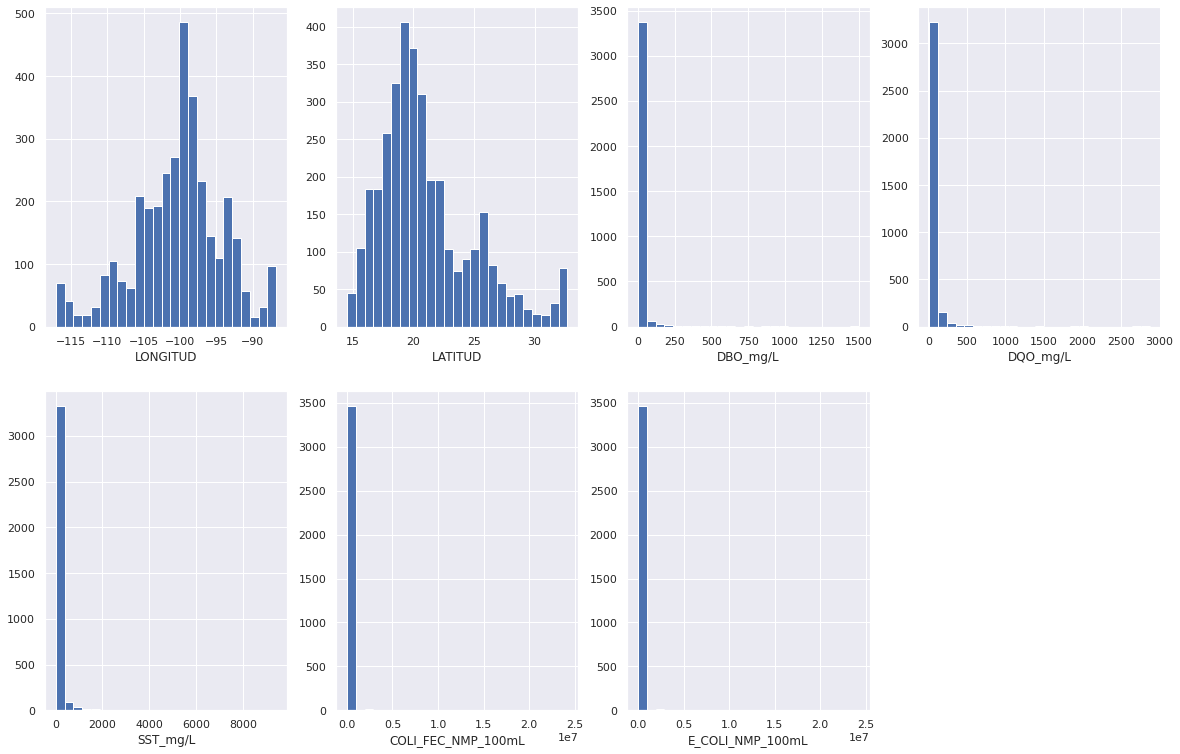

In [52]:
plot_hist(df3[NUMERICOS_NAME])

In [53]:
def box_plot(df_data, col_name):
    sns.set(rc={'figure.figsize':(20, 20)})
    len_col = len(col_name)
    for k in range(0, len_col):
      plt.subplot(int(len_col/2), 4, k + 1)
      X_tcopy = df_data[col_name[k]].copy()
      X_tcopy.fillna(X_tcopy.median(), inplace=True)
      plt.boxplot(X_tcopy)
      plt.xlabel(col_name[k])
    plt.show()

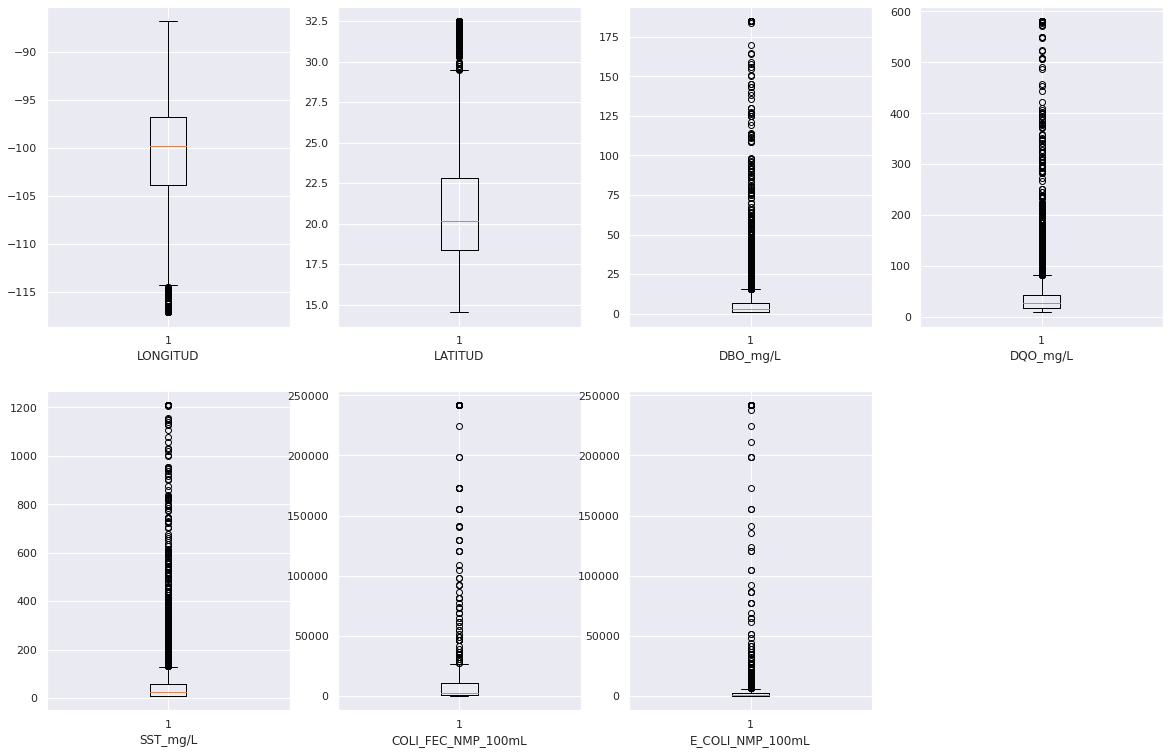

In [54]:
results = df3[NUMERICOS_NAME].copy()
for num_name in NUMERICOS_NAME:
    X_tcopy = results[num_name].copy()
    X_tcopy.fillna(X_tcopy.median(), inplace=True)
    results[num_name] = X_tcopy.apply(lambda x: np.percentile(X_tcopy, 99) if x > np.percentile(X_tcopy , 99) else x)

box_plot(results, NUMERICOS_NAME)

In [55]:
#Transofrmacion de Variables
pipeline_bin = Pipeline(steps=[
    ('input', SimpleImputer(strategy='most_frequent')),
])

pipeline_cat = Pipeline(steps=[
    ('input', SimpleImputer(strategy='most_frequent')),
    ('transformation', OneHotEncoder(handle_unknown='ignore')),
])

pipeline_num = Pipeline(steps=[
    ('input', SimpleImputer(strategy='median')),
    ('transformation', PowerTransformer(method='yeo-johnson')),
    ('scalar', MinMaxScaler(feature_range=(0,1))),
])

pipeline_ord = Pipeline(steps = [
    ('input', SimpleImputer(strategy='most_frequent'))    
])



ctf_estrategias = [
    ('ctf_bin', pipeline_bin, BINARIOS_NAME),
    ('ctf_cat', pipeline_cat, CATEGORICA_NAME),
    ('ctf_num', pipeline_num, NUMERICOS_NAME),
    ('ctf_ord',pipeline_ord, ORDINALES_NAME)
]


ctf = ColumnTransformer(transformers=ctf_estrategias, remainder='passthrough')



# 1.3 Selecciona las variables de mayor importancia.

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ORGANISMO_DE_CUENCA  3493 non-null   object 
 1   ESTADO               3493 non-null   object 
 2   TIPO                 3493 non-null   object 
 3   SUBTIPO              3479 non-null   object 
 4   LONGITUD             3493 non-null   float64
 5   LATITUD              3493 non-null   float64
 6   DBO_mg/L             2581 non-null   float64
 7   CALIDAD_DBO          2581 non-null   float64
 8   DQO_mg/L             2581 non-null   float64
 9   CALIDAD_DQO          2581 non-null   float64
 10  SST_mg/L             3489 non-null   float64
 11  CALIDAD_SST          3489 non-null   float64
 12  COLI_FEC_NMP_100mL   2582 non-null   float64
 13  CALIDAD_COLI_FEC     2582 non-null   float64
 14  E_COLI_NMP_100mL     2582 non-null   float64
 15  CALIDAD_E_COLI       2582 non-null   f

In [73]:
# Separar X
df_final = df3.copy()

X = df_final.drop(Y, axis=1)

# Separar y
y = df_final[Y]

In [58]:
Xx_train = ctf.fit(X).transform(X)
yy_train = np.ravel(y)

In [59]:
CATEGORICA_NAME_ONE_HOT = ctf.named_transformers_['ctf_cat'].named_steps['transformation'].get_feature_names(CATEGORICA_NAME).tolist()
Caracteristicas = BINARIOS_NAME + CATEGORICA_NAME_ONE_HOT + NUMERICOS_NAME + ORDINALES_NAME

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
Arb = DecisionTreeClassifier()
Bos = RandomForestClassifier()

In [67]:
Arb.fit(Xx_train, yy_train)
Bos.fit(Xx_train, yy_train)

RandomForestClassifier()

In [68]:
importances = list(Bos.feature_importances_)

feature_importances_Bos = [(feature, round(importance, 2)) for feature, importance in zip(Caracteristicas, importances)]

feature_importances_Bos = sorted(feature_importances_Bos, key = lambda x: x[1], reverse = True)


Importancia_Boque = {}
for element in feature_importances_Bos:
  if element[1] > 0:
    Importancia_Boque[element[0]] = element[1]

In [69]:
#Importancia Arbol

importances = list(Arb.feature_importances_)

feature_importances_Arb = [(feature, round(importance, 2)) for feature, importance in zip(Caracteristicas, importances)]

feature_importances_Arb = sorted(feature_importances_Arb, key = lambda x: x[1], reverse = True)

Importancia_Arbol = {}
for element in feature_importances_Arb:
  if element[1] > 0:
    Importancia_Arbol[element[0]] = element[1]

In [70]:
variables_finales = [list(Importancia_Boque.keys()) + list(Importancia_Arbol.keys())]

Variables_Seleccionadas = []
[Variables_Seleccionadas.append(x) for x in variables_finales if x not in Variables_Seleccionadas]
Variables_Seleccionadas = Variables_Seleccionadas[0]

In [71]:
Variables_Seleccionadas

['CUMPLE_CON_DQO',
 'DQO_mg/L',
 'CALIDAD_DQO',
 'COLI_FEC_NMP_100mL',
 'CUMPLE_CON_ENTEROC',
 'CUMPLE_CON_CF',
 'CALIDAD_COLI_FEC',
 'CUMPLE_CON_OD',
 'DBO_mg/L',
 'CUMPLE_CON_E_COLI',
 'E_COLI_NMP_100mL',
 'CALIDAD_DBO',
 'GRUPO_COSTERO',
 'GRUPO_LOTICO',
 'LONGITUD',
 'LATITUD',
 'SST_mg/L',
 'CUMPLE_CON_DBO',
 'CUMPLE_CON_SST',
 'TIPO_COSTERO',
 'TIPO_COSTERO (HUMEDAL)',
 'TIPO_LOTICO',
 'SUBTIPO_RIO',
 'CALIDAD_SST',
 'CALIDAD_E_COLI',
 'DQO_mg/L',
 'E_COLI_NMP_100mL',
 'COLI_FEC_NMP_100mL',
 'CUMPLE_CON_ENTEROC',
 'CUMPLE_CON_OD',
 'GRUPO_LOTICO',
 'CUMPLE_CON_SST',
 'SST_mg/L',
 'CALIDAD_DQO']

# 1.4 Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

In [74]:
X = pd.DataFrame(ctf.fit_transform(X).toarray(), columns = Caracteristicas )
X = X[variables_finales[0]]


In [75]:
# Crear conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [76]:
# K-Fold de 4 splits y 3 repeticiones
kfold = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=0)

Arb2 = DecisionTreeClassifier()
Bos2 = RandomForestClassifier()

# 1.5 Explora que clasificador es el más optimo

## 1.5.1 Arbol

In [77]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}

In [82]:
dt = DecisionTreeClassifier()
grid_values = {
               'max_depth' : [4,10,20,30],
               'criterion': ['gini', 'entropy'],
               'class_weight' : ["balanced", {1:.32,2:.34,3:.34},None]}

In [83]:
grid_search_dt= GridSearchCV(dt, param_grid = grid_values, scoring = scoring, refit='precision',cv=kfold, n_jobs=-1)
grid_search_dt = grid_search_dt.fit(X_train, np.ravel(y_train));

In [84]:
grid_search_dt.best_params_

{'class_weight': {1: 0.32, 2: 0.34, 3: 0.34},
 'criterion': 'entropy',
 'max_depth': 10}

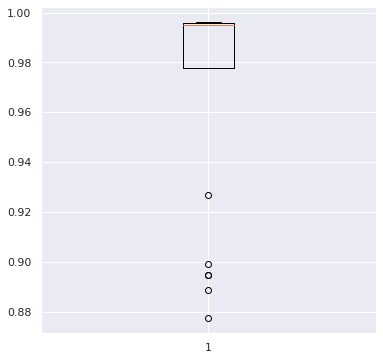

In [86]:
#GRAFICO DEL ARBOL 
fig = plt.figure(figsize =(6, 6))
plt.boxplot(grid_search_dt.cv_results_['mean_test_f1'])
plt.show()

In [88]:
#Escogemos los parametros del mejor arbol
Arbol_mejor = DecisionTreeClassifier(criterion = grid_search_dt.best_params_['criterion'], max_depth = grid_search_dt.best_params_['max_depth'], class_weight = grid_search_dt.best_params_['class_weight']  )


In [90]:
Arbol_mejor.fit(X_train, np.ravel(y_train))

DecisionTreeClassifier(class_weight={1: 0.32, 2: 0.34, 3: 0.34},
                       criterion='entropy', max_depth=10)

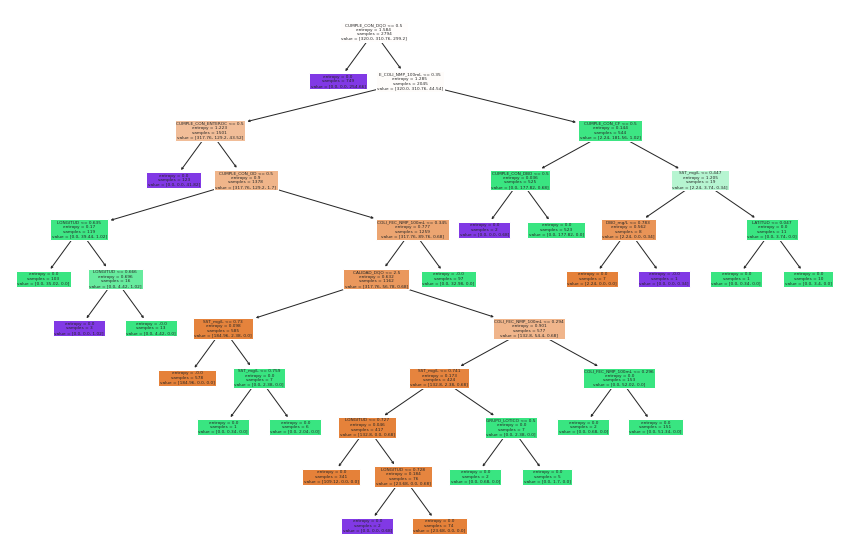

In [92]:
figura = plt.figure(figsize=(15,10))
_ = tree.plot_tree(Arbol_mejor, 
                   feature_names=X_train.columns.to_list(),  
                 
                   filled=True)

In [94]:
y_test = np.ravel(y_test)
y_score_Arbol = Arbol_mejor.predict(X_test)

## 1.5.2 Bosque

In [95]:
bosque = RandomForestClassifier()
grid_values = {'n_estimators': [10, 30, 50, 100],
               'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
               'max_depth' : [5,10,15,20],
               'criterion': ['gini', 'entropy']
              }

In [97]:
grid_search_bosque = GridSearchCV(bosque, param_grid = grid_values, scoring = scoring, refit='precision',cv=kfold, n_jobs=-1)
grid_search_bosque = grid_search_bosque.fit(X_train, np.ravel(y_train));
grid_search_bosque.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 0.25,
 'n_estimators': 100}

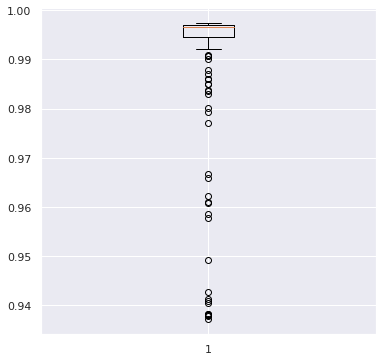

In [99]:
#BOSQUE
fig = plt.figure(figsize =(6, 6))
plt.boxplot(grid_search_bosque.cv_results_['mean_test_f1'])
plt.show()

In [100]:
Bosque_mejor = RandomForestClassifier(n_estimators = grid_search_bosque.best_params_['n_estimators'], max_depth = grid_search_bosque.best_params_['max_depth'] ,max_features = grid_search_bosque.best_params_['max_features'], criterion = grid_search_bosque.best_params_['criterion'])

In [101]:
Bosque_mejor.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=15, max_features=0.25)

In [102]:
y_score_Bosque = Bosque_mejor.predict(X_test)

**ANALISIS**
> Ambos modelos tienen un performance perfecto con valores de 100% de F1, precisión y exactitud
> En este sentido no hay un modelo mejor que otro. 

# 1.6 Determina el grado de exactitud a través del reporte de clasificación

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_score_Bosque, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       267
           2       1.00      1.00      1.00       221
           3       1.00      1.00      1.00       211

    accuracy                           1.00       699
   macro avg       1.00      1.00      1.00       699
weighted avg       1.00      1.00      1.00       699



In [104]:
print(classification_report(y_test, y_score_Arbol, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       267
           2       1.00      1.00      1.00       221
           3       1.00      1.00      1.00       211

    accuracy                           1.00       699
   macro avg       1.00      1.00      1.00       699
weighted avg       1.00      1.00      1.00       699



# 1.7 Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.


In [107]:
print('Confusion Matrix Arbol: \n' + str(confusion_matrix(y_test,y_score_Arbol)))

Confusion Matrix Arbol: 
[[266   1   0]
 [  0 221   0]
 [  0   0 211]]


In [111]:
print('Confusion Matrix Arbol: \n' + str(confusion_matrix(y_test,y_score_Bosque)))

Confusion Matrix Arbol: 
[[266   1   0]
 [  0 221   0]
 [  0   0 211]]
